# HomeWork 9

**DeadLine : 23:59 19 Azar 1401**

**Total points : 100pts**


Import some prerequisites:

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Run this cell for plotting.

In [38]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

# PART 3

**Point : 35 pts**

Here is for your helper functions(optional).

In [39]:
def erode(A,B):
    m,n= A.shape 
    constant= 1
    imgErode= np.zeros((m,n), dtype=np.uint8)
    for i in range(constant, m-constant):
        for j in range(constant,n-constant):
            temp= A[i-constant:i+constant+1, j-constant:j+constant+1]
            product= temp*B
            MinHold = 255
            for x in range (B.shape[0]):
                for y in range (B.shape[1]):
                    if B[x,y] !=0:
                        if product[x,y] < MinHold:
                            MinHold = product[x,y]
            imgErode[i,j]= MinHold

    return imgErode


def dilate(A,B):
    m,n= A.shape 
    constant= 1
    imgErode= np.zeros((m,n), dtype=np.uint8)
    for i in range(constant, m-constant):
        for j in range(constant,n-constant):
            temp= A[i-constant:i+constant+1, j-constant:j+constant+1]
            product= temp*B
            MaxHold = 0
            for x in range (B.shape[0]):
                for y in range (B.shape[1]):
                    if B[x,y] !=0:
                        if product[x,y] > MaxHold:
                            MaxHold = product[x,y]
            imgErode[i,j]= MaxHold

    return imgErode
            

def Sk(A,B,k):
    if k == 0:
        return A
    else:
        return Sk(erode(A, B),B,k-1)



Implement this function to get the input image and return the skeleton of the input image.

Test your implementation (don't change this cell).

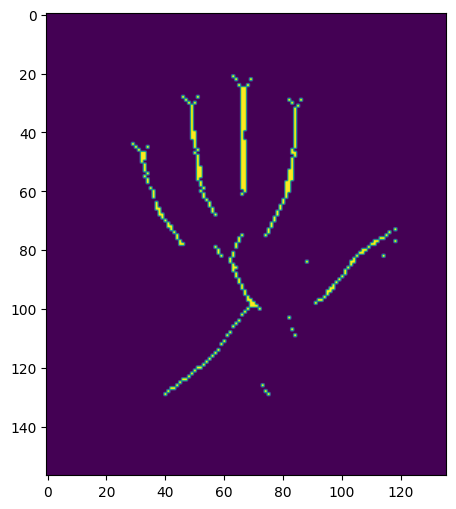

In [40]:
image = cv2.imread('images\img1.jpg', cv2.IMREAD_GRAYSCALE)
img = image.copy()
for counter in range(256):
    img[image == counter] = 255 - counter
    img[image == 255-counter] = counter



params = []
size = np.size(img)
skel = np.zeros(img.shape,np.uint8)
 
ret,img = cv2.threshold(img,127,255,0)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False
 
while( not done):
    eroded = cv2.erode(img,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img,temp)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()
 
    zeros = size - cv2.countNonZero(img)
    if zeros==size:
        done = True
 
plt.imshow(skel)


# plt.imshow(output)

In [43]:

def get_skeleton(image):
    """
    Finds the skeleton of the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The skeleton image.  
        numpy.ndarray: The parameters required for reconstructing image
    """
    
    res = image.copy()
    params = []

    

    for counter in range(256):
        res[image == counter] = 255 - counter
        res[image == 255-counter] = counter

    res[res<=127] = 0
    res[res>127] = 1
    
    
    B = np.array((
        [0,1,0],
        [1,1,1],
        [0,1,0],
    ), dtype=np.uint8)


    while(True):
        if len(params) == 0:
            params.append(res-dilate(erode(res,B),B))
        else:
            hold = erode(res,B)
            out = hold - dilate(erode(hold,B),B)
            if (np.all(hold==0)):
                break
            else:
                res = hold.copy()
                params.append(out)

    # output = np.zeros(res.shape, dtype="uint8")
    # for item in params:
    #     for x in range(item.shape[0]):
    #         for y in range(item.shape[1]):
    #             if item[x,y] == 1:
    #                 output[x,y] = 1

    res = sum(params)
    
    return res, params

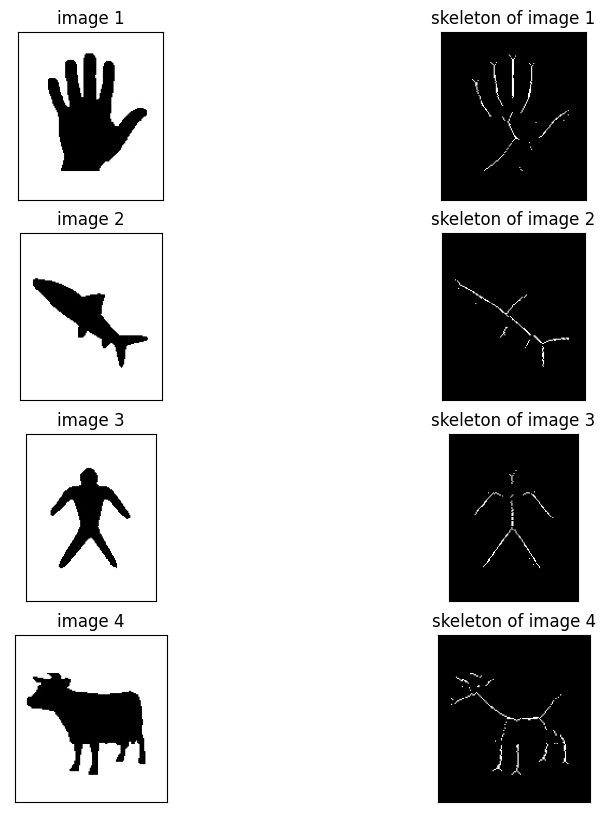

In [44]:
image_list = []

image1 = cv2.imread('images\img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_skeleton, params1 = get_skeleton(image1)
image_list.append([image1_skeleton, 'skeleton of image 1','img'])

image2 = cv2.imread('images\img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_skeleton, params2 = get_skeleton(image2)
image_list.append([image2_skeleton, 'skeleton of image 2','img'])

image3 = cv2.imread('images\img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_skeleton, params3 = get_skeleton(image3)
image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])

image4 = cv2.imread('images\img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_skeleton, params4 = get_skeleton(image4)
image_list.append([image4_skeleton, 'skeleton of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q3-a')

In [51]:
def recons_skeleton(image, params):
    """
    Finds the original image from the skeleton.
    
    Parameters:
        image (numpy.ndarray): The skeleton of image.
        params (numpy.ndarray): The parameters required for reconstructing image
    
    Returns:
        numpy.ndarray: The original image.  
    """
    
    res = image.copy()

    for counter in range(len(params)):
        for x in range(params[counter].shape[0] ):
            for y in range(params[counter].shape[1]) :
                if (params[counter][x,y] != 0):
                    res = cv2.circle(res, (y,x), counter, 255, 1)
        
    
    return res

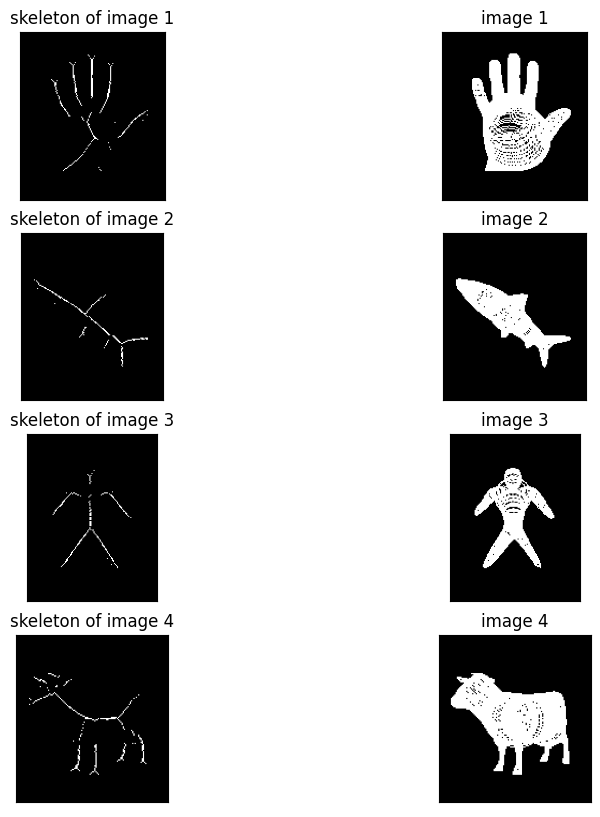

In [52]:
image_list = []

image_list.append([image1_skeleton, 'skeleton of image 1', 'img'])
image_list.append([recons_skeleton(image1_skeleton, params1), 'image 1','img'])

image_list.append([image2_skeleton, 'skeleton of image 2', 'img'])
image_list.append([recons_skeleton(image2_skeleton, params2), 'image 2','img'])

image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])
image_list.append([recons_skeleton(image3_skeleton, params3), 'image 3', 'img'])

image_list.append([image4_skeleton, 'skeleton of image 4', 'img'])
image_list.append([recons_skeleton(image4_skeleton, params4), 'image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q3-b')

In [ ]:
def neighbours(x,y,image):
    "Return 8-neighbours of image point P1(x,y), in a clockwise order"
    img = image
    x_1, y_1, x1, y1 = x-1, y-1, x+1, y+1
    return [ img[x_1][y], img[x_1][y1], img[x][y1], img[x1][y1],     # P2,P3,P4,P5
                img[x1][y], img[x1][y_1], img[x][y_1], img[x_1][y_1] ]    # P6,P7,P8,P9

def transitions(neighbours):
    "No. of 0,1 patterns (transitions from 0 to 1) in the ordered sequence"
    n = neighbours + neighbours[0:1]      # P2, P3, ... , P8, P9, P2
    return sum( (n1, n2) == (0, 1) for n1, n2 in zip(n, n[1:]) )  # (P2,P3), (P3,P4), ... , (P8,P9), (P9,P2)

In [ ]:
def get_skeleton(image):
    """
    Finds the skeleton of the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The skeleton image.  
        numpy.ndarray: The parameters required for reconstructing image
    """
    for inx, arr in enumerate(image):
        for iny, m in enumerate(arr):
            if(m>200):
                image[inx][iny] = 0
            else:
                image[inx][iny] = 1

    params = 5 
    #Write your code here
    Image_Thinned = image.copy()  # deepcopy to protect the original image
    changing1 = changing2 = 1        #  the points to be removed (set as 0)
    while changing1 or changing2:   #  iterates until no further changes occur in the image
        # Step 1
        changing1 = []
        rows, columns = Image_Thinned.shape               # x for rows, y for columns
        for x in range(1, rows - 1):                     # No. of  rows
            for y in range(1, columns - 1):            # No. of columns
                P2,P3,P4,P5,P6,P7,P8,P9 = n = neighbours(x, y, Image_Thinned)
                if (Image_Thinned[x][y] == 1     and    # Condition 0: Point P1 in the object regions 
                    2 <= sum(n) <= 6   and    # Condition 1: 2<= N(P1) <= 6
                    transitions(n) == 1 and    # Condition 2: S(P1)=1  
                    P2 * P4 * P6 == 0  and    # Condition 3   
                    P4 * P6 * P8 == 0):         # Condition 4
                    changing1.append((x,y))
        for x, y in changing1: 
            Image_Thinned[x][y] = 0
        # Step 2
        changing2 = []
        for x in range(1, rows - 1):
            for y in range(1, columns - 1):
                P2,P3,P4,P5,P6,P7,P8,P9 = n = neighbours(x, y, Image_Thinned)
                if (Image_Thinned[x][y] == 1   and        # Condition 0
                    2 <= sum(n) <= 6  and       # Condition 1
                    transitions(n) == 1 and      # Condition 2
                    P2 * P4 * P8 == 0 and       # Condition 3
                    P2 * P6 * P8 == 0):            # Condition 4
                    changing2.append((x,y))    
        for x, y in changing2: 
            Image_Thinned[x][y] = 0
    return Image_Thinned, params
    

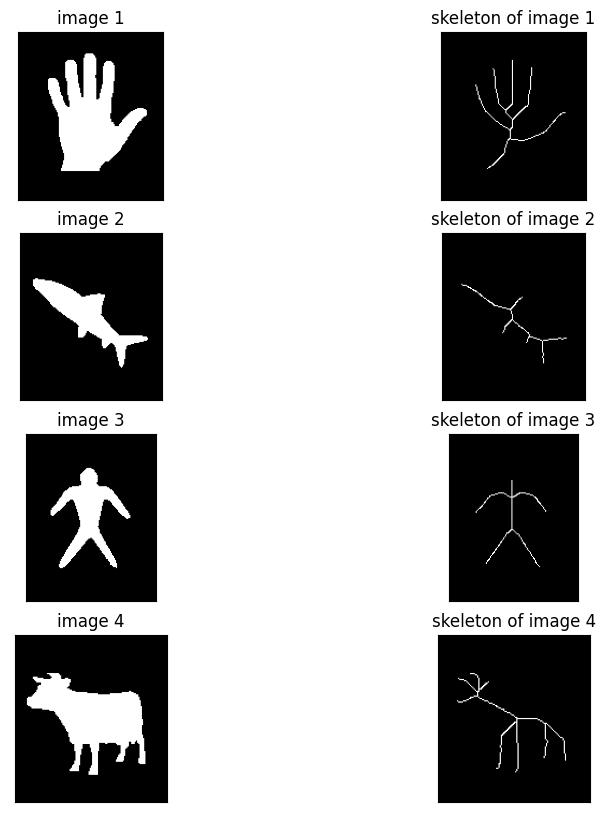

In [ ]:
image_list = []

image1 = cv2.imread('images\img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_skeleton, params1 = get_skeleton(image1)
image_list.append([image1_skeleton, 'skeleton of image 1','img'])

image2 = cv2.imread('images\img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_skeleton, params2 = get_skeleton(image2)
image_list.append([image2_skeleton, 'skeleton of image 2','img'])

image3 = cv2.imread('images\img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_skeleton, params3 = get_skeleton(image3)
image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])

image4 = cv2.imread('images\img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_skeleton, params4 = get_skeleton(image4)
image_list.append([image4_skeleton, 'skeleton of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q3-a')

Implement this function to get the input image as skeleton and return the reconstruction of the skeleton.

In [ ]:
def recons_skeleton(image, params):
    """
    Finds the original image from the skeleton.
    
    Parameters:
        image (numpy.ndarray): The skeleton of image.
        params (numpy.ndarray): The parameters required for reconstructing image
    
    Returns:
        numpy.ndarray: The original image.  
    """
    
    res = image.copy()

    # for counter in range(len(params)):
    #     for x in range(params[counter].shape[0] ):
    #         for y in range(params[counter].shape[1]) :
    #             if (params[counter][x,y] != 0):
    #                 res = cv2.circle(res, (y,x), counter, 255, 1)
        
    
    # return res

    x,y = res.shape
    d = params
    i=1
    while(i<x-1):
        j=1
        while(j<y-1):
            if(sum(image[i-d:i+d+1, j-d:j+d+1].flatten())!=0):
                res[i][j]=1
            j+=1
        i+=1
    
    return res

Test your implementation (don't change this cell).

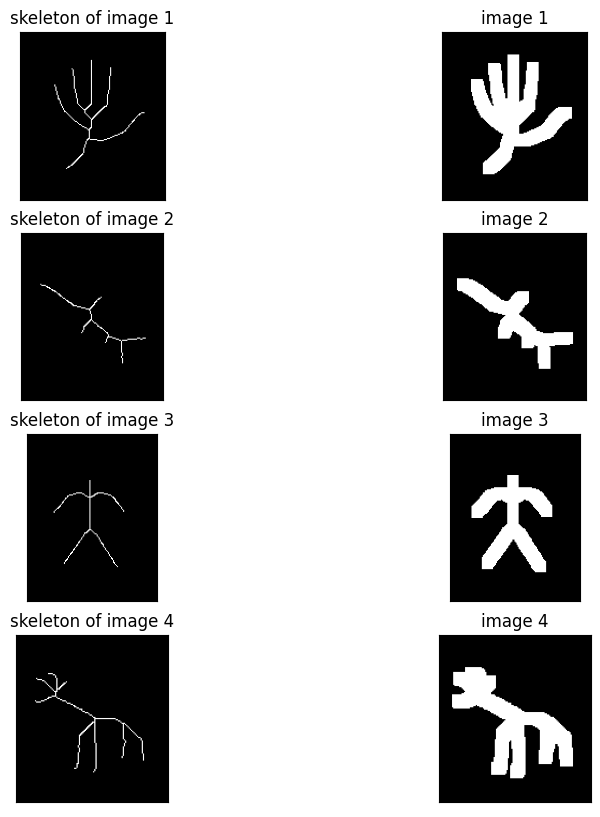

In [ ]:
image_list = []

image_list.append([image1_skeleton, 'skeleton of image 1', 'img'])
image_list.append([recons_skeleton(image1_skeleton, params1), 'image 1','img'])

image_list.append([image2_skeleton, 'skeleton of image 2', 'img'])
image_list.append([recons_skeleton(image2_skeleton, params2), 'image 2','img'])

image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])
image_list.append([recons_skeleton(image3_skeleton, params3), 'image 3', 'img'])

image_list.append([image4_skeleton, 'skeleton of image 4', 'img'])
image_list.append([recons_skeleton(image4_skeleton, params4), 'image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q3-b')

# PART 4

**Point : 30 pts**

Here is for your helper functions(optional).

Implement this function to detect shapes and number of cars in an input image.

In [ ]:

def detect_car_num(image):
    '''
    Detects shapes and number of cars in the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
        integer: number of cars
    '''
    
    result = image.copy()
    cars_num = None
    
    gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
    bw = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                                cv2.THRESH_BINARY, 15, -5)
    horizontal = np.copy(bw)

    cols = horizontal.shape[1]
    horizontal_size = cols // 1
    # Create structure element for extracting horizontal lines through morphology operations
    horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 2))
    # Apply morphology operations
    horizontal = cv2.erode(horizontal, horizontalStructure)
    horizontal = cv2.dilate(horizontal, horizontalStructure)

    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    closing = cv2.morphologyEx(bw-horizontal, cv2.MORPH_CLOSE, kernel,iterations = 3)

    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
    opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel,iterations = 1)
    

    analysis = cv2.connectedComponentsWithStats(opening,
                                                4,
                                                cv2.CV_32S)
    (totalLabels, label_ids, values, centroid) = analysis
    

    output = np.zeros(opening.shape, dtype="uint8")
    for i in range(1, totalLabels):
        area = values[i, cv2.CC_STAT_AREA]
        if (area > 880) and (area < 7500):
            componentMask = (label_ids == i).astype("uint8") * 255
            output = cv2.bitwise_or(output, componentMask)
    

    contours,hierarchy = cv2.findContours(output, 1, 2)
    counter = 0
    for cnt in contours:
        output_hold = np.zeros(opening.shape, dtype="uint8")
        if cv2.contourArea(cnt) > 700:
            x,y,w,h = cv2.boundingRect(cnt)
            if(w<180):
                counter += 1
                output_hold = cv2.rectangle(result,(x,y),(x+w,y+h),(0,0,255),2)
            else : 
                output_hold = output

    plt.imshow(output_hold,cmap='gray')

    
    cars_num = counter
    print(counter)
    return result,  cars_num 

Test your implementation (don't change this cell).

21


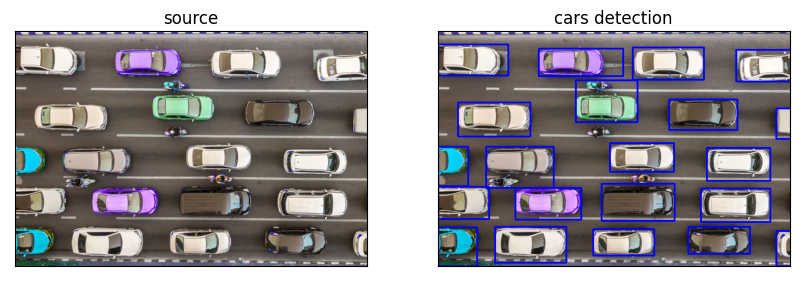

In [ ]:
image_list = []
image = cv2.imread('images\img5.jpg', cv2.IMREAD_COLOR)
image_list.append([image, 'source', 'img'])
image_list.append([detect_car_num(image)[0], 'cars detection', 'img'])
plotter(image_list, 1, 2, True, 8, 6, 'Q4-a')

Implement this function to detect shapes and number of flowers in an input image.

In [ ]:
def detect_flower_num(image):
    '''
    Detects shapes and number of flowers in the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
        integer: number of flowers
    '''
    
    result = image.copy()
    flowers_num = None

    image = cv2.cvtColor(result, cv2.COLOR_BGR2HSV)
    lower = np.array([22, 150, 0], dtype="uint8")
    upper = np.array([110, 255, 255], dtype="uint8")
    out = cv2.inRange(image, lower, upper)


    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
    # out = cv2.morphologyEx(out, cv2.MORPH_GRADIENT, kernel,iterations=1)
    out = cv2.morphologyEx(out, cv2.MORPH_CLOSE, kernel,iterations=2)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
    out = cv2.morphologyEx(out, cv2.MORPH_OPEN, kernel,iterations=1)
    

    hold_img = out.copy()
    out[hold_img == 255] = 0
    out[hold_img == 0] = 255

    # plt.imshow(out,cmap='gray')

    contours,hierarchy = cv2.findContours(out, 1, 2)
    counter = 0
    for cnt in contours:
        if cv2.contourArea(cnt) > 250:
            x,y,w,h = cv2.boundingRect(cnt)
            if(w<180):
                counter += 1
                cv2.rectangle(result,(x,y),(x+w,y+h),(0,0,255),2)

    plt.imshow(result,cmap='gray')
    print(counter)

    
    return result,flowers_num

Test your implementation (don't change this cell).

23


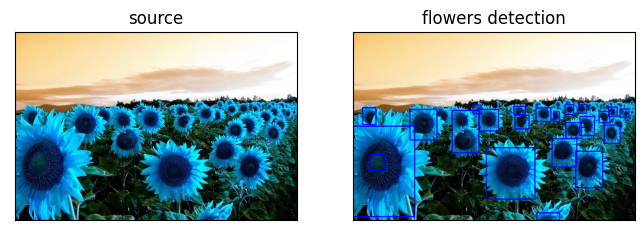

In [ ]:
image_list = []
image = cv2.imread('images\img6.jpg', cv2.IMREAD_COLOR)
image_list.append([image, 'source', 'img'])
image_list.append([detect_flower_num(image)[0], 'flowers detection', 'img'])
plotter(image_list, 1, 2, True, 8, 6, 'Q4-b')

End!!!